In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Activation

In [14]:
nett = tf.keras.models.Sequential([
   Input(shape=(32, 32, 3)),
   Convolution2D(36, (3, 3), input_shape = (32, 32, 3)),
   Activation("relu"),
   MaxPooling2D(pool_size=(2, 2)),
   Convolution2D(36, (2, 3)),
   Activation("relu"),
   MaxPooling2D(pool_size=(2, 2)),
   Convolution2D(36, (2, 2)),
   Activation("relu"),
   MaxPooling2D(pool_size=(2, 2)),
   Flatten(),
   Dense(84),
   Activation("relu"),
   Dense(10),
   Activation("softmax"),
])

In [15]:
nett.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [16]:
nett.fit(x_train, y_train, 1000, 50, validation_data=(x_test, y_test))

Epoch 1/50
50/50 [==============================] - 17s 315ms/step - loss: 2.0833 - accuracy: 0.2351 - val_loss: 1.8605 - val_accuracy: 0.3297
Epoch 2/50
50/50 [==============================] - 15s 308ms/step - loss: 1.7436 - accuracy: 0.3770 - val_loss: 1.6534 - val_accuracy: 0.4041
Epoch 3/50
50/50 [==============================] - 15s 295ms/step - loss: 1.6103 - accuracy: 0.4197 - val_loss: 1.5705 - val_accuracy: 0.4291
Epoch 4/50
50/50 [==============================] - 15s 297ms/step - loss: 1.5320 - accuracy: 0.4470 - val_loss: 1.4904 - val_accuracy: 0.4680
Epoch 5/50
50/50 [==============================] - 15s 294ms/step - loss: 1.4636 - accuracy: 0.4716 - val_loss: 1.4414 - val_accuracy: 0.4827
Epoch 6/50
50/50 [==============================] - 14s 286ms/step - loss: 1.4101 - accuracy: 0.4932 - val_loss: 1.3989 - val_accuracy: 0.4950
Epoch 7/50
50/50 [==============================] - 16s 322ms/step - loss: 1.3709 - accuracy: 0.5098 - val_loss: 1.3519 - val_accuracy: 0.5184

In [17]:
nett.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0005 - accuracy: 0.6512


[1.0004558563232422, 0.651199996471405]

In [18]:
y_pred = nett.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [19]:
import numpy as np

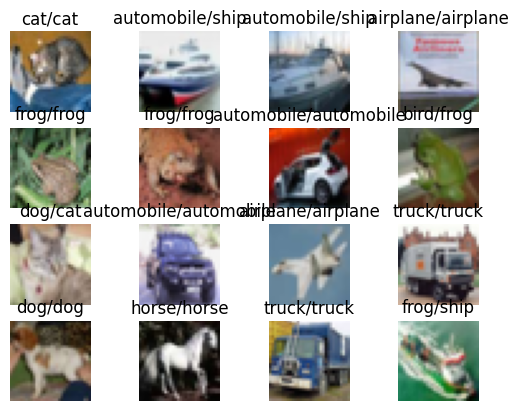

In [20]:
ylabels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.title(ylabels[np.argmax(y_pred[i])] + "/" + ylabels[y_test[i][0]])
  plt.imshow(x_test[i])
  plt.axis("off")